In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from basic_functions import data_load, save_df, get_base_path

In [2]:
df = data_load("data/y_train.csv")

Data loaded!


In [3]:
print(df.columns)

Index(['income'], dtype='object')


# Original target classes

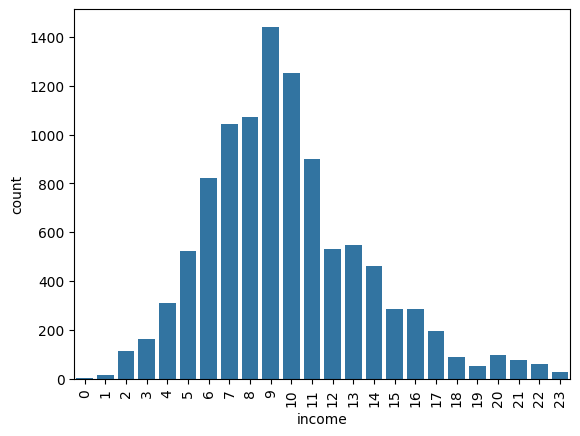

In [4]:
sns.countplot(
    data = df,
    x="income"
)
plt.tick_params(axis="x", rotation=90 )

To improve the results and provide more meaningful insights, I want to consolidate the income classes into 3 to 5 broader categories, such as "low," "medium," and "high."

# 1D K-Means Clustering
24 --> 5 income classes

In [5]:
from sklearn.cluster import KMeans

In [6]:
income_classes = np.arange(0,24).reshape(-1, 1)
counts = df.value_counts().sort_index()

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init=100, random_state=42)
kmeans.fit(income_classes,sample_weight=counts)

labels = kmeans.labels_

income_to_cluster = {cls:cluster for cls, cluster in zip(income_classes.flatten(),labels)}


In [7]:
x = np.arange(1,25).reshape(-1,1)

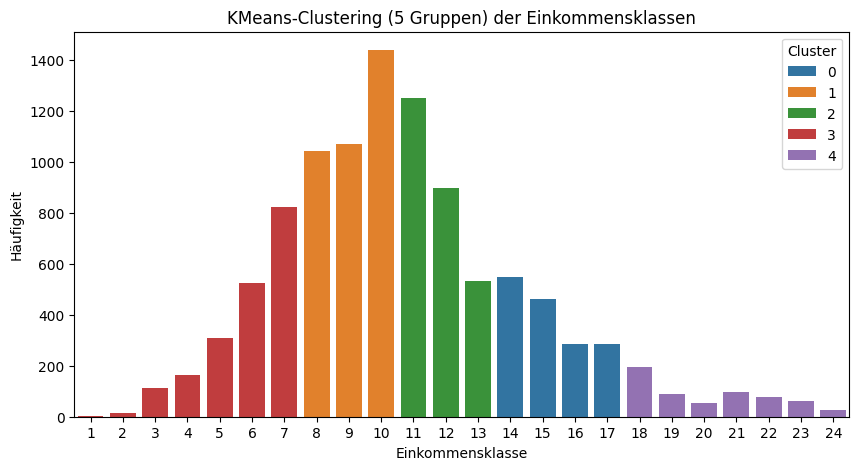

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(x=x.flatten(), y=counts, hue=labels, dodge=False, palette='tab10')
plt.xlabel('Einkommensklasse')
plt.ylabel('Häufigkeit')
plt.title(f'KMeans-Clustering ({n_clusters} Gruppen) der Einkommensklassen')
plt.legend(title='Cluster')
plt.show()

In [9]:
income_classes = np.arange(0,24)
income_to_cluster = dict(zip(income_classes.flatten(), labels))
df["income"] = df["income"].map(income_to_cluster)

cluster_to_label = {
    3: "lowest",
    1: "lower middle",
    2: "middle",
    0: "high",
    4: "highest"
}
df["income"] = df["income"].map(cluster_to_label)

### Save transformed data

In [10]:
save_df(df, "data/y_train_clustered.csv")

Data saved!


### Save cluster mapping

In [11]:
import json

income_to_cluster_clean = {
    "income":{
    float(k): int(v) for k, v in income_to_cluster.items()
    }
}

base_path = get_base_path()
path = base_path / "data" / "income_to_cluster_mapping.json"
with open(path, "w") as f:
    json.dump(income_to_cluster_clean, f)

### Transform test-data

In [12]:
y_test = data_load("data/y_test.csv")
y_test["income"] = y_test["income"].map(income_to_cluster)
print(f"after Clustering: {y_test['income'].unique()}")

#Apply Labels

y_test["income"] = y_test['income'].map(cluster_to_label)
print(f"after Labeling: {y_test['income'].unique()}")

#save y_test
save_df(y_test, "data/y_test_clustered.csv")

Data loaded!
after Clustering: [1 2 3 0 4]
after Labeling: ['lower middle' 'middle' 'lowest' 'high' 'highest']
Data saved!
